# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

В качестве датасета взял выгрузку данных с сайта "наш.дом.рф" из прошлого ДЗ.

In [88]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import math
import numpy as np
#from scipy import stats
#from tqdm.auto import tqdm

Запрашиваю 5000 объектов:

In [3]:
offset_ = 0
limit_ = 5000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_list = objects_data.get('data').get('list')

In [172]:
objID = []
for obj in objects_list:
    objID.append(obj['objId'])
objID

[13399,
 13398,
 13383,
 13397,
 13391,
 23682,
 36321,
 36912,
 44076,
 23494,
 27476,
 10891,
 39174,
 39176,
 39175,
 27049,
 41421,
 33928,
 41420,
 30292,
 19414,
 18363,
 19457,
 18709,
 18708,
 21535,
 21534,
 21537,
 21536,
 41625,
 41624,
 26503,
 42192,
 27542,
 26903,
 20524,
 29184,
 27779,
 24093,
 32811,
 32829,
 32819,
 32836,
 32815,
 32843,
 27802,
 32820,
 32827,
 23862,
 27807,
 32838,
 32818,
 23863,
 32837,
 27806,
 32825,
 27803,
 32839,
 32840,
 32841,
 32830,
 32835,
 32826,
 32814,
 32831,
 32833,
 32813,
 32817,
 27808,
 27801,
 32824,
 32823,
 32842,
 32816,
 32832,
 32834,
 27798,
 32828,
 32812,
 23864,
 21720,
 45249,
 33899,
 17712,
 17707,
 33745,
 44474,
 44489,
 44621,
 15888,
 15886,
 15889,
 15885,
 15891,
 15890,
 37264,
 45256,
 24820,
 41618,
 41616,
 41612,
 41620,
 24819,
 24818,
 24817,
 41613,
 41615,
 41617,
 41621,
 41614,
 41619,
 45772,
 18136,
 18135,
 44752,
 32082,
 32080,
 37465,
 33525,
 3148,
 33224,
 33134,
 33203,
 33161,
 33223,
 

In [21]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
full_obj_list = []
for id in objID:
    try:
        obj_res = requests.get(url + str(id))
        full_obj_data = obj_res.json()
        full_obj_list.append(full_obj_data.get('data'))
    except:
        continue

In [173]:
len(full_obj_list) # Добавил в сбор данных обработчик try/except т.к. периодически возвращались ощибки от сервера.
                    #В этот раз ошибка была только в 1 запросе из 5000

4999

In [174]:
df = pd.json_normalize(full_obj_list)

In [176]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [177]:
df_55 = df[df['region'] == 55]
df_55 = df_55[np.isnan(df_55['objPriceAvg']) != True]
df_55

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
118,33525,137506,55,"г Омск, улица Маршала Жукова - Бульварная, д. ...",12,17,0,2022-12-31,Монолит-кирпич,Без отделки,Есть,0,0.00,55-000060,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,28-04-2022 12:17,54.9647,73.3919,0,0,Бизнес,11-05-2022 01:10,"[{'objId': 33525, 'pdId': 137506, 'rpdId': 586...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,44398,17,0,0.0,308,0,True,15-03-2023 12:00,0,0.0,0.0,1.0,36.0,0.0,1,1,1.0,3.0,1.0,0.614835,49678.0,ООО ПМК-944 ТЖ (ИНН: 5501104634),1.0,[],False,apartotelmarshal@yandex.ru,0,B,9,7619,АПАРТ ОТЕЛЬ МАРШАЛ,АПАРТ ОТЕЛЬ МАРШАЛ,АПАРТ ОТЕЛЬ МАРШАЛ,0,1,0,Омская область,+7(913)611-06-67,www.apartotelmarshal.ru,apartotelmarshal@yandex.ru,5514009272,1135514000995,550101001,"Омская область, город Омск, улица Губкина дом ...","644023 Омская область, город Омск, улица Губки...",586120,0,55.0,Доронин Сергей Александрович,Апарт-отель Маршал,4,Общество с ограниченной ответственностью,ООО,7643.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,17824,36881,55,"г Омск, улица 4-я Северная",1,1,0,2023-09-30,Другое,Без отделки,Есть,50,0.00,55-000061,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,06-05-2022 05:38,55.0048,73.351,0,0,Комфорт,11-05-2022 01:10,"[{'objId': 17824, 'pdId': 36881, 'rpdId': 5916...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,25626,1,0,0.0,0,0,True,30-12-2023 12:00,0,1.0,1.0,1.0,50.0,0.0,0,0,0.0,0.0,0.0,0.298513,17207.0,NaN,1.0,[],False,priem@dsk-omsk.ru,0,B,8,10798,ДСК-3,ДСК-3,ДОМОСТРОИТЕЛЬНЫЙ КОМБИНАТ-3,0,2,0,Омская область,+7(381)256-04-41,dskomsk.ru,priem@dsk-omsk.ru,5506146860,1165543093253,550601001,"Омская область, г Омск, улица 3-я Молодежная д...","Омская область, г Омск, улица 3-я Молодежная, ...",591676,1,55.0,Макаров Александр Петрович,NaN,4,Общество с ограниченной ответственностью,ООО,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

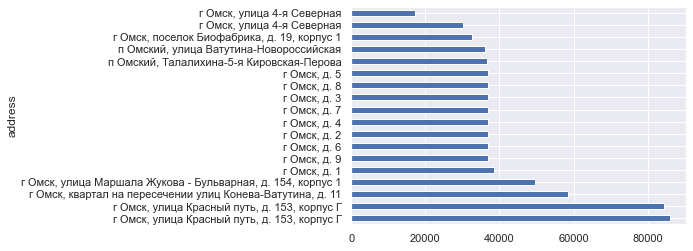

In [178]:
price_series_55 = df_55.set_index('address')['objPriceAvg']
price_series_55.sort_values(ascending=False).plot(kind='barh')
plt.show()

По данному графику можно проследить как меняется средняя стоимость за квадратный метр в зависимости от адресса дома в г. Омске. По графику можем заметить что у новостроек на одной и той же улице или рядом цена похожа.

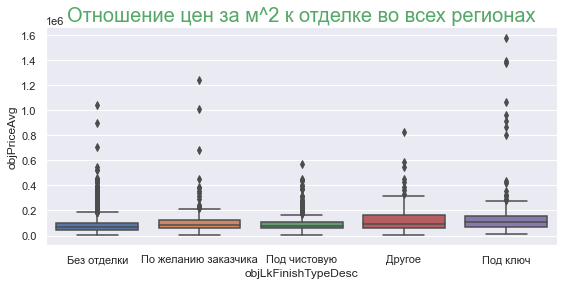

In [179]:
df_all = df[np.isnan(df['objPriceAvg']) != True]

sns.set(style='darkgrid')  

sns.catplot(
    x='objLkFinishTypeDesc', 
    y='objPriceAvg', 
    kind='box',
    data=df_all,
    height=4, 
    aspect=2
    
)
plt.title('Отношение цен за м^2 к отделке во всех регионах', size=20, color='g');

Если рассматривать ситуацию с ценами за квадратный метр во всех регионах сразу, то видим очень большие выбросы по цене для всех вариантов отделки.

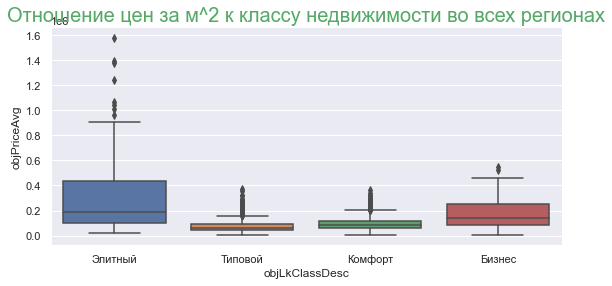

In [180]:
sns.set(style='darkgrid')  

sns.catplot(
    x='objLkClassDesc', 
    y='objPriceAvg', 
    kind='box',
    data=df_all,
    height=4, 
    aspect=2
    
)
plt.title('Отношение цен за м^2 к классу недвижимости во всех регионах', size=20, color='g');

Если рассматривать цены за квадратный метр во всех регионах сразу в разрезе класса недвижимости, то выбросы становятся сильно меньше (за исключением элитной недвижимости)

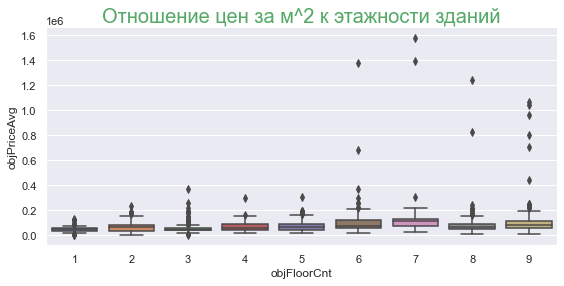

In [181]:
sns.set(style='darkgrid')  

sns.catplot(
    x='objFloorCnt', 
    y='objPriceAvg', 
    kind='box',
    data=df_all.query("objFloorCnt < 10"),
    height=4, 
    aspect=2
    
)
plt.title('Отношение цен за м^2 к этажности зданий', size=20, color='g');

Если рассматривать цены для зданий с менее чем 10 этажами то можем заметить для каких типов домов есть наибольшее количество выбросов.

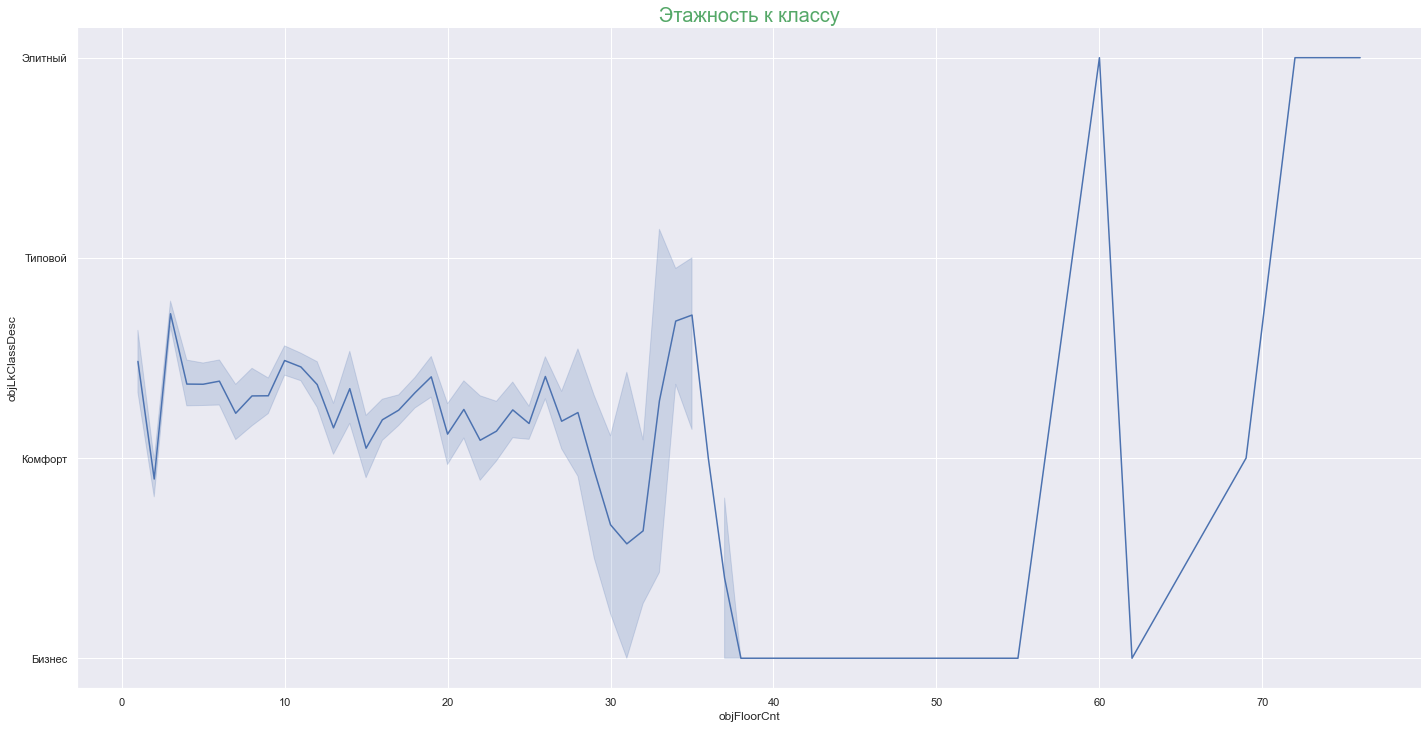

In [182]:
sns.set(style='darkgrid')  

sns.relplot(
    x='objFloorCnt', 
    y='objLkClassDesc', 
    kind='line',
    data=df_all,
    height=10, 
    aspect=2
    
)
plt.title('Этажность к классу', size=20, color='g');

Распределение класса недвижимости в зависимости от этажности здания (после 35 этаже это всегда либо бизнес, либо элитный)

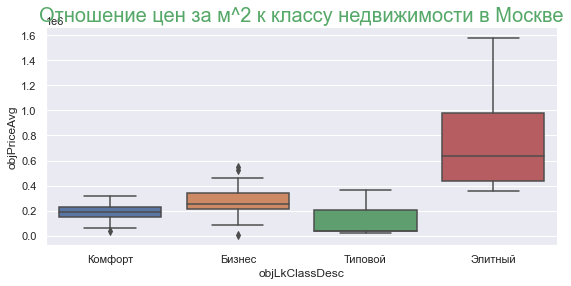

In [183]:
df_77 = df_all[df_all['region'] == 77]

sns.set(style='darkgrid')  

sns.catplot(
    x='objLkClassDesc', 
    y='objPriceAvg', 
    kind='box',
    data=df_77,
    height=4, 
    aspect=2
    
)
plt.title('Отношение цен за м^2 к классу недвижимости в Москве', size=20, color='g');

Если рассматривать цены за квадратный метр в разрезе класса недвижимости только по Московскому региону, то выбросов уже почти не осталось (есть только в бизнес классе и единичные выбросы в комфорте). Можно заметить что у элитной недвижимости разброс цен очень большой, но при этом все в рамках размаха.

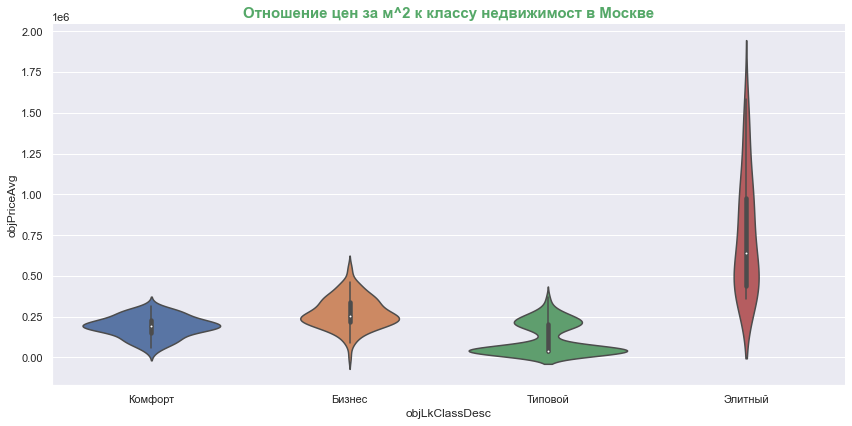

In [184]:
sns.catplot(
    x='objLkClassDesc',
    y='objPriceAvg',
    data=df_77,
    kind='violin',
    height=6,
    aspect=2)
plt.title('Отношение цен за м^2 к классу недвижимост в Москве', size=15, color='g', weight='bold');

На данном типе диаграммы распределение цен относительно класса недвижимости более показательно. Из интересного: для типового класса есть 2 центра масс, а у элитного сегмента довольно плавное распределение на очень большой разброс цен.

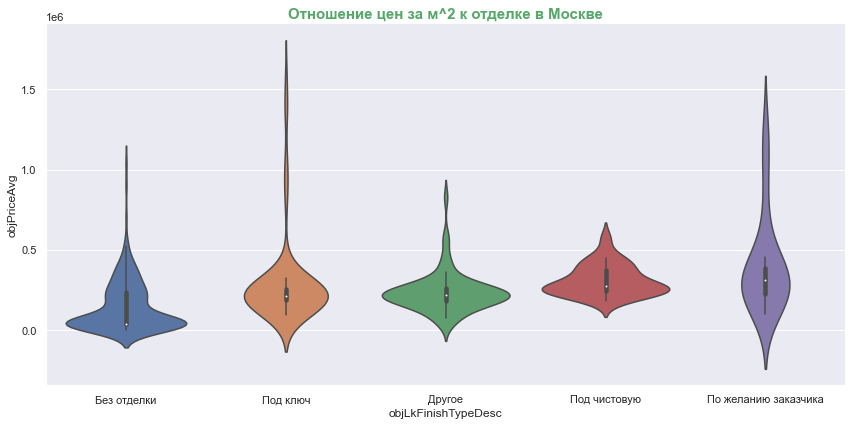

In [185]:
sns.catplot(
    x='objLkFinishTypeDesc',
    y='objPriceAvg',
    data=df_77,
    kind='violin',
    height=6,
    aspect=2)
plt.title('Отношение цен за м^2 к отделке в Москве', size=15, color='g', weight='bold');

На данной диаграмме так же хорошо заметны выбросы, которые при этом не особо частотные.

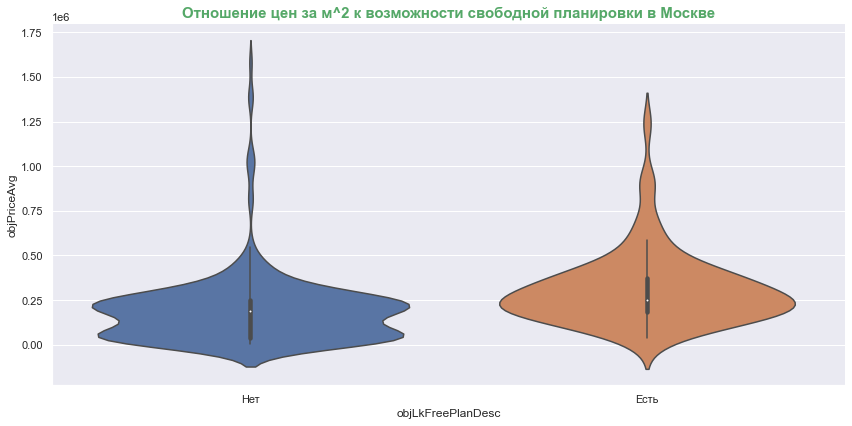

In [186]:
sns.catplot(
    x='objLkFreePlanDesc',
    y='objPriceAvg',
    data=df_77,
    kind='violin',
    height=6,
    aspect=2)
plt.title('Отношение цен за м^2 к возможности свободной планировки в Москве', size=15, color='g', weight='bold');

На данной диаграмме можно увидеть, что в среднем цены на недвижимость со свободной планировкой выше, но при этом более высокие выбросы у недвижимости без возможности свободной планировки.

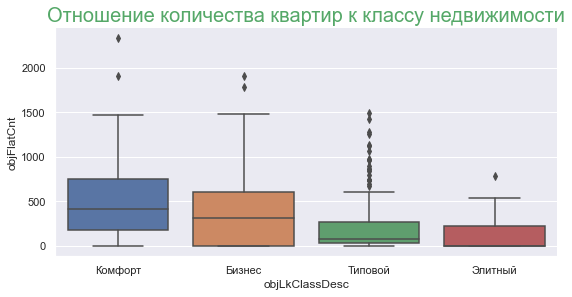

In [187]:
sns.set(style='darkgrid')  

sns.catplot(
    x='objLkClassDesc', 
    y='objFlatCnt', 
    kind='box',
    data=df_77,
    height=4, 
    aspect=2
    
)
plt.title('Отношение количества квартир к классу недвижимости', size=20, color='g');

На этой диаграмме можем проследить, что чем выше недвижимость по классу, тем меньше квартир в ней предусмотрено. Например для элитной недвижимости наименьшее количество квартир входит в 25% процентиль.